In [1]:
# Imports
import sqlite3 as sq3
import pandas as pd
import pandas.io.sql as pds

In [2]:
# Create an SQL Database Connection to a sample SQL database
path = '/Users/ivanpatel/Desktop/zVO-XrdgTM-Tvl63YDzP_Q_127c70857e6a4cc2aebc05de76a94b07_01a_DEMO_Reading_Data/data/classic_rock.db'
con = sq3.Connection(path)

In [3]:
# A function that takes the query, connection, and number of rows you want 
# it to return. 

def return_query_results(query, connection, n_rows=10):
    data = pd.read_sql(query, connection)
    return data.head(n_rows)

In [4]:
# Write a query and fetch the data we're looking for.
query = '''
SELECT *
FROM rock_songs;
'''
return_query_results(query, con, 5)

,Song,Artist,Release_Year,PlayCount
0,Caught Up in You,.38 Special,1982.0,82
1,Hold On Loosely,.38 Special,1981.0,85
2,Rockin' Into the Night,.38 Special,1980.0,18
3,Art For Arts Sake,10cc,1975.0,1
4,Kryptonite,3 Doors Down,2000.0,13


In [5]:
# For a given artist and release year, return the total number of songs 
# and avg_plays. Order by num_songs in descending order

query = '''
SELECT Artist, Release_Year, COUNT(*) AS Num_Songs, AVG(PlayCount) as Avg_Plays
    FROM rock_songs
    GROUP BY Artist, Release_Year
    ORDER BY num_songs desc;
'''
return_query_results(query, con, 5)

,Artist,Release_Year,Num_Songs,Avg_Plays
0,The Beatles,1967.0,23,6.565217
1,Led Zeppelin,1969.0,18,21.000000
2,The Beatles,1965.0,15,3.800000
3,The Beatles,1968.0,13,13.000000
4,The Beatles,1969.0,13,15.000000


In [6]:
query = '''
SELECT Artist, Release_Year, COUNT(*) AS Num_Songs, AVG(PlayCount) as Avg_Plays
    FROM rock_songs
    GROUP BY Artist, Release_Year
    ORDER BY num_songs desc;
'''

# We'll specify additional arguments
data = pd.read_sql(query, con, 
                  coerce_float=True, 
                  parse_dates=['Release_Year'],
                  chunksize=5)

# Print the data
for index, observations in enumerate(data):
    if index < 5:
        print(f'Observations index: {index}'.format(index))
        display(observations)

Observations index: 0


,Artist,Release_Year,Num_Songs,Avg_Plays
0,The Beatles,1970-01-01 00:32:47,23,6.565217
1,Led Zeppelin,1970-01-01 00:32:49,18,21.000000
2,The Beatles,1970-01-01 00:32:45,15,3.800000
3,The Beatles,1970-01-01 00:32:48,13,13.000000
4,The Beatles,1970-01-01 00:32:49,13,15.000000


Observations index: 1


,Artist,Release_Year,Num_Songs,Avg_Plays
0,Led Zeppelin,1970-01-01 00:32:50,12,13.166667
1,Led Zeppelin,1970-01-01 00:32:55,12,14.166667
2,Pink Floyd,1970-01-01 00:32:59,11,41.454545
3,Pink Floyd,1970-01-01 00:32:53,10,29.100000
4,The Doors,1970-01-01 00:32:47,10,28.900000


Observations index: 2


,Artist,Release_Year,Num_Songs,Avg_Plays
0,Fleetwood Mac,1970-01-01 00:32:57,9,35.666667
1,Jimi Hendrix,1970-01-01 00:32:47,9,24.888889
2,The Beatles,1970-01-01 00:32:43,9,2.444444
3,The Beatles,1970-01-01 00:32:44,9,3.111111
4,Elton John,1970-01-01 00:32:53,8,18.500000


Observations index: 3


,Artist,Release_Year,Num_Songs,Avg_Plays
0,Led Zeppelin,1970-01-01 00:32:51,8,47.750000
1,Led Zeppelin,1970-01-01 00:32:53,8,34.125000
2,Boston,1970-01-01 00:32:56,7,69.285714
3,Rolling Stones,1970-01-01 00:32:49,7,36.142857
4,Van Halen,1970-01-01 00:32:58,7,51.142857


Observations index: 4


,Artist,Release_Year,Num_Songs,Avg_Plays
0,Bruce Springsteen,1970-01-01 00:32:55,6,7.666667
1,Bruce Springsteen,1970-01-01 00:33:04,6,11.500000
2,Creedence Clearwater Revival,1970-01-01 00:32:49,6,23.833333
3,Creedence Clearwater Revival,1970-01-01 00:32:50,6,18.833333
4,Def Leppard,1970-01-01 00:33:07,6,32.000000


## Lab Exercise: Reading in database files

 - Create a variable, `path`, containing the path to the `baseball.db` contained in `resources/`
 - Create a connection, `con`, that is connected to database at `path`
 - Create a variable, `query`, containing a SQL query which reads in all data from the `allstarfull` table
 - Create a variable, `observations`, by using pandas' [read_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html)

### Optional
 - Create a variable, `tables`, which reads in all data from the table `sqlite_master`
 - Pretend that you were interesting in creating a new baseball hall of fame. Join and analyze the tables to evaluate the top 3 all time best baseball players.

In [7]:
# Create a path to baseball.db
path = '/Users/ivanpatel/Desktop/5Y1nHm5xSouNZx5ucaqLZg_c93a585749804b1e87603f707f04bd3f_01b_LAB_Reading_Data/baseball.db'

# Create a connection
con = sq3.Connection(path)

In [8]:
# Create a query 
query = '''
SELECT *
FROM allstarfull;
'''
return_query_results(query, con, 10)

,index,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,0,gomezle01,1933,0,ALS193307060,NYA,AL,1.0,1.0
1,1,ferreri01,1933,0,ALS193307060,BOS,AL,1.0,2.0
2,2,gehrilo01,1933,0,ALS193307060,NYA,AL,1.0,3.0
3,3,gehrich01,1933,0,ALS193307060,DET,AL,1.0,4.0
4,4,dykesji01,1933,0,ALS193307060,CHA,AL,1.0,5.0
5,5,cronijo01,1933,0,ALS193307060,WS1,AL,1.0,6.0
6,6,chapmbe01,1933,0,ALS193307060,NYA,AL,1.0,7.0
7,7,simmoal01,1933,0,ALS193307060,CHA,AL,1.0,8.0
8,8,ruthba01,1933,0,ALS193307060,NYA,AL,1.0,9.0
9,9,averiea01,1933,0,ALS193307060,CLE,AL,1.0,NaN


In [9]:
query = '''
SELECT *
FROM sqlite_master;
'''
table = pd.read_sql(query, con)
table

,type,name,tbl_name,rootpage,sql
0,table,allstarfull,allstarfull,2,"CREATE TABLE ""allstarfull"" (\n""index"" INTEGER,..."
1,index,ix_allstarfull_index,allstarfull,3,"CREATE INDEX ""ix_allstarfull_index""ON ""allstar..."
2,table,schools,schools,26,"CREATE TABLE ""schools"" (\n""index"" INTEGER,\n ..."
3,index,ix_schools_index,schools,31,"CREATE INDEX ""ix_schools_index""ON ""schools"" (""..."
4,table,batting,batting,99,"CREATE TABLE ""batting"" (\n""index"" INTEGER,\n ..."
5,index,ix_batting_index,batting,100,"CREATE INDEX ""ix_batting_index""ON ""batting"" (""..."


In [10]:
query = '''
SELECT playerID, sum(GP) as num_games_played, AVG(startingPos) as avg_startingPos
    FROM allstarfull
    GROUP BY playerID
    ORDER BY num_games_played DESC, avg_startingPos ASC
'''

allstar = pd.read_sql(query, con)

In [11]:
display(allstar.head())

,playerID,num_games_played,avg_startingPos
0,musiast01,24.0,6.357143
1,mayswi01,24.0,8.000000
2,aaronha01,24.0,8.470588
3,robinbr01,18.0,5.000000
4,ripkeca01,18.0,5.823529


## EDA LAB

In [1]:
import os
import numpy as np
import pandas as pd

In [5]:
filepath = "/Users/ivanpatel/Desktop/Machine Learning Foundations/IBM Machine Learning /cSAeRkqMTvSgHkZKjH702w_c8e79662a4fd4740b637563b9f913dca_01c_LAB_EDA/iris_data.csv"
data = pd.read_csv(filepath)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [6]:
# Number of Rows
print(data.shape[0])

# Column Names
print('\n', data.columns,'\n')

# Data Types of each column
print(data.dtypes)

150

 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object') 

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [7]:
# The species column values does not begin with 'Iris-. This solution should be fine.'
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [12]:
# Number of Species present
display(data['species'].value_counts())

# Mean, Median, Quanties, and Ranges (min-max) for petal and sepal measurement

# A permanent way to add a range row is to store a copy of data.describe(), data_summary, and make changes to the copy
data_summary = data.describe()
data_summary.loc['range']= data.describe().loc['max'] - data.describe().loc['min']

# Select the needed metrics
data_summary.rename({'50%':'median'}, inplace = True)
data_summary.loc[['mean', '25%', 'median', '75%', 'range']]

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [13]:
# Mean and Median of each measurement - using a single groupby call.
data.groupby('species').agg(['mean', 'median'])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

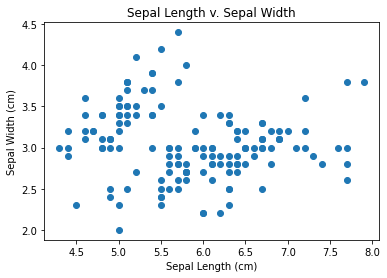

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = plt.axes()
ax.scatter(data.sepal_length, data.sepal_width)

# Add the labels
_ = ax.set(xlabel = 'Sepal Length (cm)',
      ylabel = 'Sepal Width (cm)', 
      title = 'Sepal Length v. Sepal Width')

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

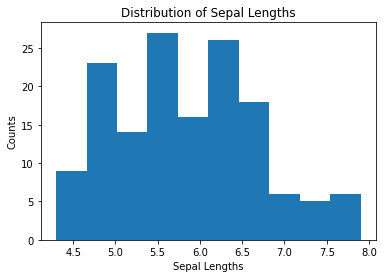

In [19]:
ax = plt.axes()
ax.hist(data.sepal_length)

# Labels
_= ax.set(xlabel = 'Sepal Lengths', title = 'Distribution of Sepal Lengths', ylabel = 'Counts')

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

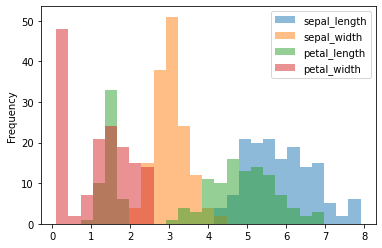

In [20]:
# Overlayed plots
_= data.plot.hist(bins=25, alpha=0.5)

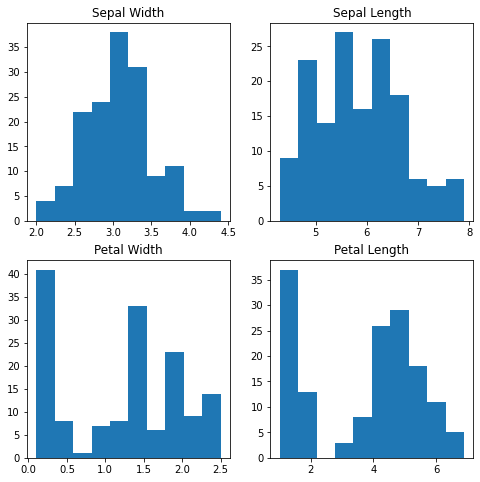

In [21]:
# Individual Histograms
fig, axs = plt.subplots(2,2, figsize=(8,8))
_= axs[0,0].hist(data['sepal_width'])
_= axs[0,0].set_title('Sepal Width')


_= axs[0,1].hist(data['sepal_length'])
_= axs[0,1].set_title('Sepal Length')

_= axs[1,0].hist(data['petal_width'])
_= axs[1,0].set_title('Petal Width')

_= axs[1,1].hist(data['petal_length'])
_= axs[1,1].set_title('Petal Length')

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

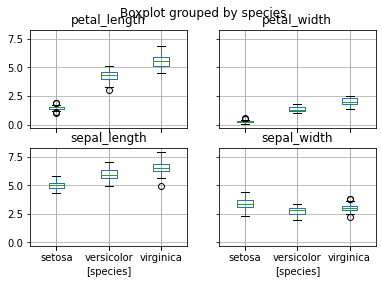

In [22]:
_= data.boxplot(by='species')

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [17]:
import seaborn as sns

In [36]:
data_stacked = data.set_index('species').stack().to_frame().reset_index().rename(columns={'level_1':'measurement', 0:'size'})
data_stacked

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,sepal_length,5.9
597,virginica,sepal_width,3.0
598,virginica,petal_length,5.1


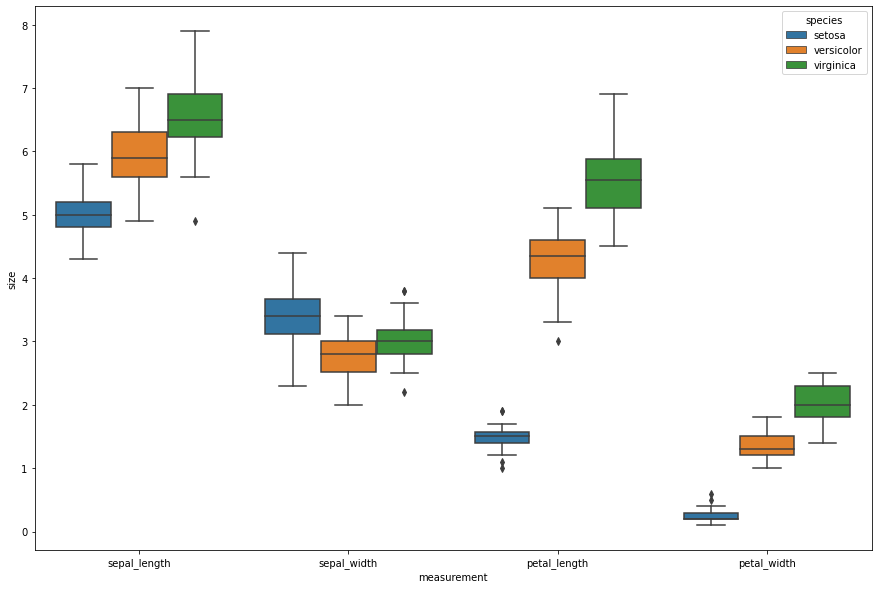

In [37]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data_stacked, x='measurement', y='size', hue='species')

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

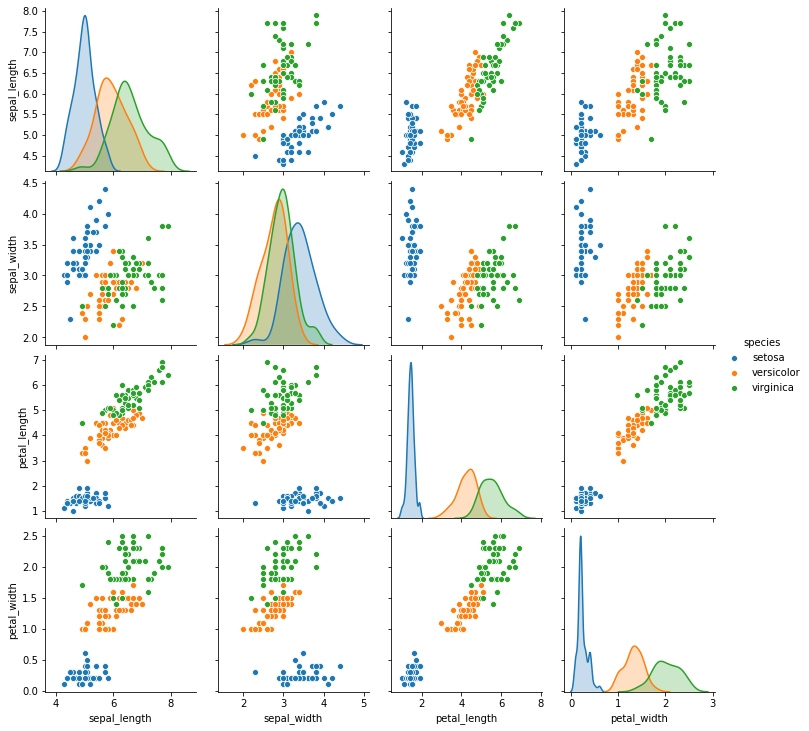

In [26]:
sns.pairplot(data, hue='species')

## Feature Engineering

In [38]:
import pandas as pd
import seaborn as sns
sns.set()

In [39]:
data=pd.read_csv('https://raw.githubusercontent.com/ultimatist/DDS/master/data/Ames_Housing_Data.tsv', sep='\t')

In [40]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [43]:
# This is recommended by the data set author to remove a few outliers

data = data.loc[data['Gr Liv Area'] <= 4000,:]
print("Number of rows in the data:", data.shape[0])
print("Number of columns in the data:", data.shape[1])
data2 = data.copy() # Keep a copy our original data 

Number of rows in the data: 2925
Number of columns in the data: 82
